In [2]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

# Zonal wind

In [3]:
path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
file = os.path.join(path, 'JRA55_srip_ubar_div1.nc')

ds = xr.open_dataset(file)
ds

<xarray.Dataset> Size: 14MB
Dimensions:   (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 6kB 1958-01-14T09:00:00 ... 2016-12-14T09...
  * pressure  (pressure) float32 88B 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 292B -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 5MB ...
    div1_pr   (time, pressure, latitude) float32 5MB ...
    div1_qg   (time, pressure, latitude) float32 5MB ...

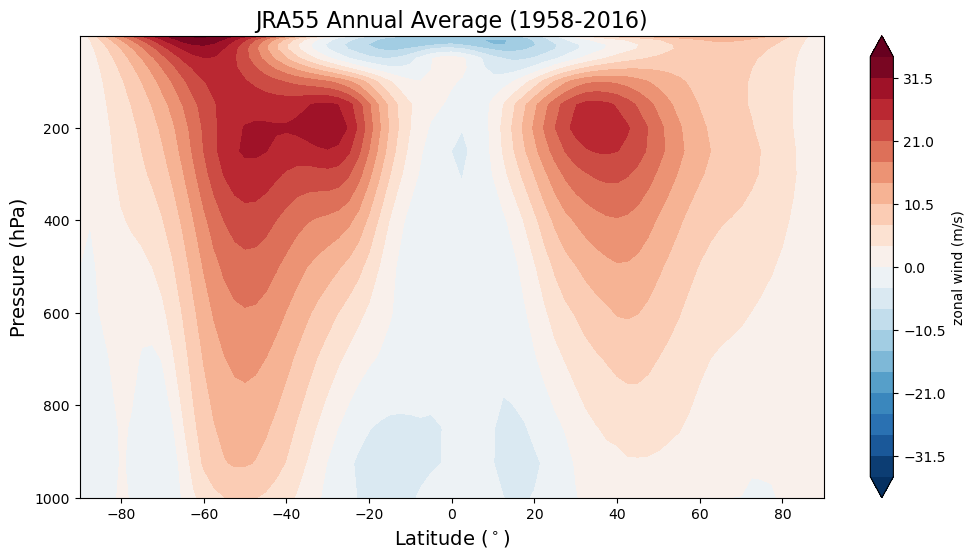

In [4]:
plt.figure(figsize=(12,6))
ubar = ds['ubar'].mean(dim='time')

plt.contourf(ubar.latitude, ubar.pressure, ubar, levels=np.linspace(-35,35,21), 
             cmap='RdBu_r', extend='both')
cbar = plt.colorbar(label='zonal wind (m/s)')
plt.title('JRA55 Annual Average (1958-2016)', fontsize=16)
plt.xlabel('Latitude ($^\circ$)', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)
plt.gca().invert_yaxis()

plt.show()

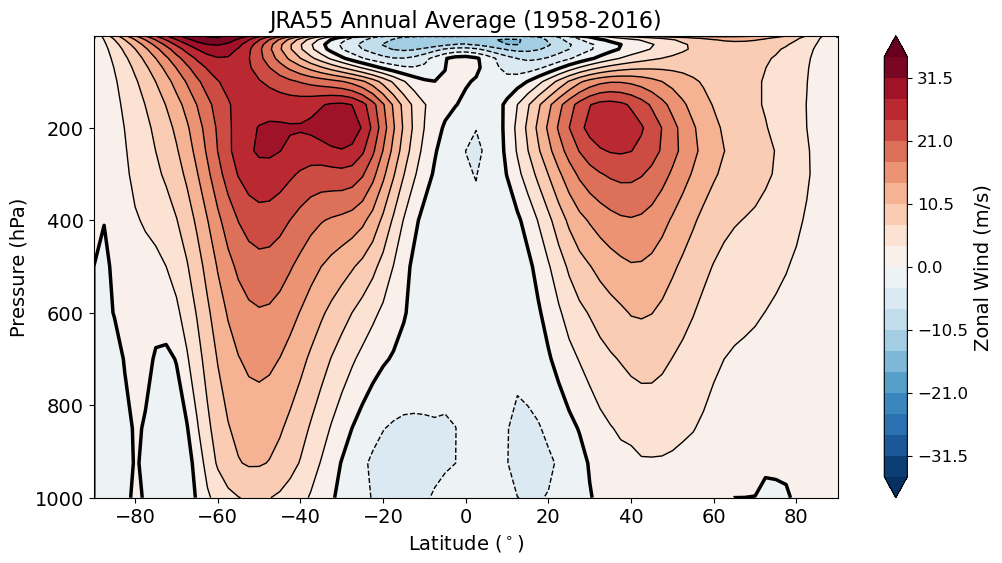

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Take time mean
ubar = ds['ubar'].mean(dim='time')

# Levels
levels = np.linspace(-35, 35, 21)

# Filled contours
plt.contourf(ubar.latitude.values, ubar.pressure.values, ubar.values, levels=levels, cmap='RdBu_r', extend='both')

# Colorbar
cbar = plt.colorbar()
cbar.set_label('Zonal Wind (m/s)', fontsize=14)   # colorbar label fontsize
cbar.ax.tick_params(labelsize=12)                 # colorbar tick label fontsize

# Positive contours (solid)
pos_levels = [lvl for lvl in levels if lvl > 0]
plt.contour(ubar.latitude.values, ubar.pressure.values, ubar.values, levels=pos_levels, colors='black', linestyles='solid', linewidths=1)

# Negative contours (dashed)
neg_levels = [lvl for lvl in levels if lvl < 0]
plt.contour(ubar.latitude.values, ubar.pressure.values, ubar.values, levels=neg_levels, colors='black', linestyles='dashed', linewidths=1)

# Zero contour (solid, thicker)
zero_level = [0]
plt.contour(ubar.latitude.values, ubar.pressure.values, ubar.values, levels=zero_level, colors='black', linestyles='solid', linewidths=2.5)

# Title and axis labels
plt.title('JRA55 Annual Average (1958-2016)', fontsize=16)
plt.xlabel('Latitude ($^\circ$)', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)

# Tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Invert pressure axis
plt.gca().invert_yaxis()

plt.savefig('plots/jra55_ubar_contour.pdf')
plt.show()
